In [1]:
using Plots
using LightGraphs

In [2]:
using GraphPlot, Compose

In [3]:
g = wheel_graph(10)

{10, 18} undirected simple Int64 graph

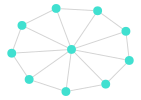

In [4]:
gplot(g)

In [5]:
import Cairo, Fontconfig

In [12]:
draw(PNG("/tmp/wheel10.png", 16cm, 16cm), gplot(g))

In [13]:
pwd()

"/Users/michael"

In [6]:
net=barabasi_albert(1000,3,2)

{1000, 1994} undirected simple Int64 graph

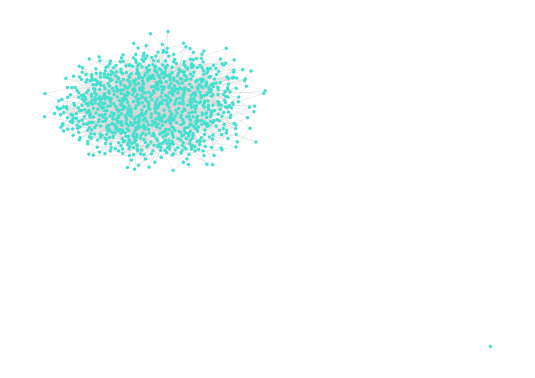

In [7]:
gplot(net)

In [162]:
net=watts_strogatz(1000,4,0.001)

{1000, 2000} undirected simple Int64 graph

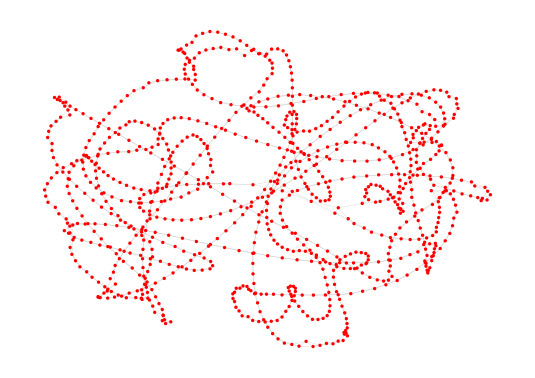

In [165]:
gplot(net,nodefillc=colorant"red")

In [52]:
pop=40
#mass gatherings
massgraph=barabasi_albert(pop^2, 3, 2)
#No more than 50 people - 20 for visualisation
gather=20
gather20=deepcopy(massgraph)
for nds in vertices(gather20)
    neigh=neighbors(gather20,nds)
    while length(neigh)>gather
        rem_edge!(gather20,nds,rand(neigh))
        neigh=neighbors(gather20,nds) 
    end
end
#
nomass=watts_strogatz(pop^2, 4, 1)  
#
home40=watts_strogatz(pop^2, 4, 0.205)  #s=0.205 => 40% compliance



{1600, 3200} undirected simple Int64 graph

In [107]:
function getbiggestbit(net)
    cc=connected_components(net)
    bigi=0
    bign=0
    for i in 1:length(cc)
        if length(cc[i])>bign 
            bign=length(cc[i])
            bigi=i
        end
    end
    return cc[bigi]
end


getbiggestbit (generic function with 1 method)

In [194]:
net=deepcopy(massgraph)
net=net[getbiggestbit(net)]
ndsz=[length(neighbors(net,vert)) for vert in vertices(net)]
gg=gplot(net, nodefillc=colorant"black",nodesize=ndsz, NODESIZE=2/pop,edgestrokec=colorant"yellow")
draw(PNG("massgraph.png", 64cm, 64cm), gg)

In [189]:
net=deepcopy(gather20)
net=net[getbiggestbit(net)]
ndsz=[length(neighbors(net,vert)) for vert in vertices(net)]
gg=gplot(net, nodefillc=colorant"red",nodesize=ndsz, NODESIZE=1/pop,edgestrokec=colorant"yellow")
draw(PNG("gather20.png", 64cm, 64cm), gg)

In [192]:
net=deepcopy(nomass)
net=net[getbiggestbit(net)]
ndsz=[length(neighbors(net,vert)) for vert in vertices(net)]
gg=gplot(net, nodefillc=colorant"blue",nodesize=ndsz, NODESIZE=0.5/pop,edgestrokec=colorant"yellow")
draw(PNG("nomass.png", 64cm, 64cm), gg)

In [195]:
net=deepcopy(home40)
net=net[getbiggestbit(net)]
ndsz=[length(neighbors(net,vert)) for vert in vertices(net)]
gg=gplot(net, nodefillc=colorant"green", NODESIZE=0.25/pop,edgestrokec=colorant"yellow")
draw(PNG("home40.png", 64cm, 64cm), gg)

In [59]:
#"covidsafe" at 50%
covidsafe=0.5
iso=covidsafe^2 #covidsafe implies removing iso fraction of all edges of graph
cv_mass=deepcopy(massgraph) 
for edg in edges(cv_mass)
    if rand(Float64) .< iso
        rem_edge!(cv_mass,edg)
    end
end
cv_gath=deepcopy(gather20) 
for edg in edges(cv_gath)
    if rand(Float64) .< iso
        rem_edge!(cv_gath,edg)
    end
end
cv_noms=deepcopy(nomass) 
for edg in edges(cv_noms)
    if rand(Float64) .< iso
        rem_edge!(cv_noms,edg)
    end
end
cv_home=deepcopy(home40) 
for edg in edges(cv_home)
    if rand(Float64) .< iso
        rem_edge!(cv_home,edg)
    end
end

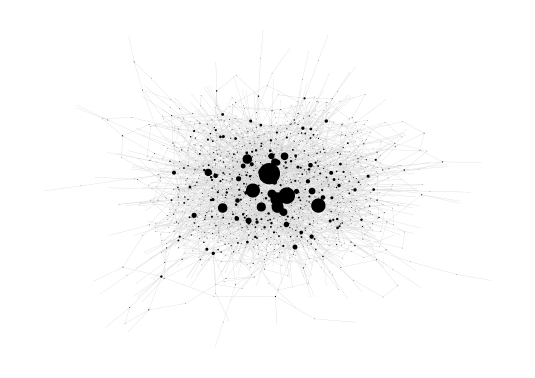

In [176]:
net=deepcopy(cv_mass)
net=net[getbiggestbit(net)]
ndsz=[length(neighbors(net,vert)) for vert in vertices(net)]
gplot(net, nodefillc=colorant"black",nodesize=ndsz,NODESIZE=2/pop)

In [185]:
net=deepcopy(cv_gath)
net=net[getbiggestbit(net)]
ndsz=[length(neighbors(net,vert)) for vert in vertices(net)]
gg=gplot(net, nodefillc=colorant"red",nodesize=ndsz,NODESIZE=1/pop,edgestrokec=colorant"yellow")
draw(PNG("cv_gath.png", 64cm, 64cm), gg)

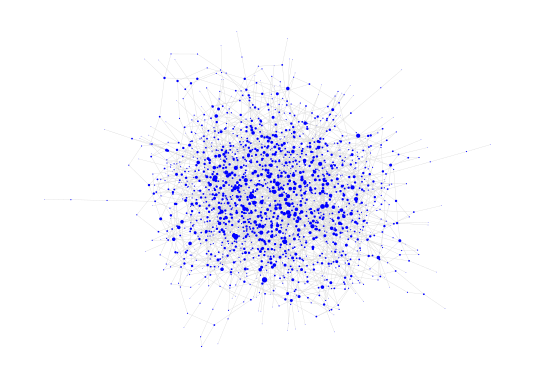

In [181]:
net=deepcopy(cv_noms)
net=net[getbiggestbit(net)]
ndsz=[length(neighbors(net,vert)) for vert in vertices(net)]
gplot(net, nodefillc=colorant"blue",nodesize=ndsz,NODESIZE=0.5/pop)

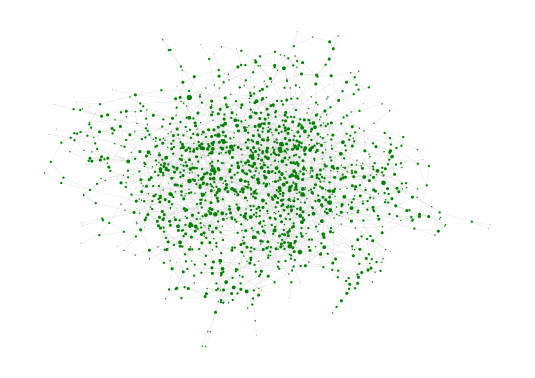

In [171]:
net=deepcopy(cv_home)
net=net[getbiggestbit(net)]
ndsz=[length(neighbors(net,vert)) for vert in vertices(net)]
gplot(net, nodefillc=colorant"green",nodesize=ndsz,NODESIZE=0.5/pop)

"/Users/michael/work/GitHub/epinets"

In [155]:
?gplot

search: gplot gplothtml pgfplots pgfplotsx GraphPlot



Given a graph and two vectors of X and Y coordinates, returns a Compose tree of the graph layout

**Arguments**

`G` Graph to draw

`layout` Optional. Layout algorithm. Currently can be one of [random*layout, circular*layout, spring*layout, shell*layout, stressmajorize*layout, spectral*layout]. Default: `spring_layout`

`locs_x, locs_y` Locations of the nodes. Can be any units you want, but will be normalized and centered anyway

`NODESIZE` Optional. Max size for the nodes. Default: `3.0/sqrt(N)`

`nodesize` Optional. Relative size for the nodes, can be a Vector. Default: `1.0`

`nodelabel` Optional. Labels for the vertices, a Vector or nothing. Default: `nothing`

`nodelabelc` Optional. Color for the node labels, can be a Vector. Default: `colorant"black"`

`nodelabeldist` Optional. Distances for the node labels from center of nodes. Default: `0.0`

`nodelabelangleoffset` Optional. Angle offset for the node labels. Default: `π/4.0`

`NODELABELSIZE` Optional. Largest fontsize for the vertice labels. Default: `4.0`

`nodelabelsize` Optional. Relative fontsize for the vertice labels, can be a Vector. Default: `1.0`

`nodefillc` Optional. Color to fill the nodes with, can be a Vector. Default: `colorant"turquoise"`

`nodestrokec` Optional. Color for the nodes stroke, can be a Vector. Default: `nothing`

`nodestrokelw` Optional. Line width for the nodes stroke, can be a Vector. Default: `0.0`

`edgelabel` Optional. Labels for the edges, a Vector or nothing. Default: `[]`

`edgelabelc` Optional. Color for the edge labels, can be a Vector. Default: `colorant"black"`

`edgelabeldistx, edgelabeldisty` Optional. Distance for the edge label from center of edge. Default: `0.0`

`EDGELABELSIZE` Optional. Largest fontsize for the edge labels. Default: `4.0`

`edgelabelsize` Optional. Relative fontsize for the edge labels, can be a Vector. Default: `1.0`

`EDGELINEWIDTH` Optional. Max line width for the edges. Default: `0.25/sqrt(N)`

`edgelinewidth` Optional. Relative line width for the edges, can be a Vector. Default: `1.0`

`edgestrokec` Optional. Color for the edge strokes, can be a Vector. Default: `colorant"lightgray"`

`arrowlengthfrac` Optional. Fraction of line length to use for arrows. Equal to 0 for undirected graphs. Default: `0.1` for the directed graphs

`arrowangleoffset` Optional. Angular width in radians for the arrows. Default: `π/9 (20 degrees)`
